In [8]:
import numpy as np
import re
import copy
import matplotlib.pyplot as plt

In [9]:
def format_polynom(polynom_str):
    polynom_str = re.sub('--', '+', polynom_str)
    polynom_str = re.sub(r'\+-', '-', polynom_str)
    polynom_str = re.sub('-', ' - ', polynom_str)
    polynom_str = re.sub(r'\+', ' + ', polynom_str)

    return polynom_str

In [10]:
def lu_decompose(A):
    n = len(A)
    L = [[0 for _ in range(n)] for _ in range(n)]
    U = copy.deepcopy(A)
    
    for k in range(1, n):
        for i in range(k - 1, n):
            for j in range(i, n):
                L[j][i] = U[j][i] / U[i][i]

        for i in range(k, n):
            for j in range(k - 1, n):
                U[i][j] = U[i][j] - L[i][k - 1] * U[k - 1][j]

    return L, U

def solve_system(lu, b):
    L = lu[0]
    U = lu[1]
    n = len(L)
    y = [0 for _ in range(n)]

    for i in range(n):
        s = 0

        for j in range(i):
            s += L[i][j] * y[j]
        y[i] = (b[i] - s) / L[i][i]

    x = [0 for _ in range(n)]

    for i in range(n - 1, -1, -1):
        s = 0

        for j in range(n - 1, i - 1, -1):
            s += U[i][j] * x[j]
        x[i] = (y[i] - s) / U[i][i]

    return x

In [11]:
def least_squares(x, y, n):
    assert len(x) == len(y)
    A = []
    b = []

    for k in range(n + 1):
        A.append([sum(map(lambda x: x**(i + k), x)) for i in range(n + 1)])
        b.append(sum(map(lambda x: x[0] * x[1]**k, zip(y, x))))

    lu = lu_decompose(A)

    return solve_system(lu, b)


def p(coefs, x):
    return sum([c * x**i for i, c in enumerate(coefs)])

def sum_squared_errors(x, y, ls_coefs):
    y_ls = [p(ls_coefs, x_i) for x_i in x]

    return sum((y_i - y_ls_i)**2 for y_i, y_ls_i in zip(y, y_ls))

In [12]:
def draw_plot(x_i, y_i, ls1, ls2):
    plt.scatter(x_i, y_i)
    plt.plot(x_i, [p(ls1, i) for i in x_i], label='degree 1')
    plt.plot(x_i, [p(ls2, i) for i in x_i], label='degree 2')
    plt.title('03-03')
    plt.legend()
    plt.show()

In [13]:
x_i = np.array([-0.7, -0.4, -0.1, 0.2, 0.5, 0.8])
y_i = np.array([2.3462, 1.9823, 1.671, 1.3694, 1.0472, 0.6435])

ls1 = least_squares(x_i, y_i, 1)
ls2 = least_squares(x_i, y_i, 2)

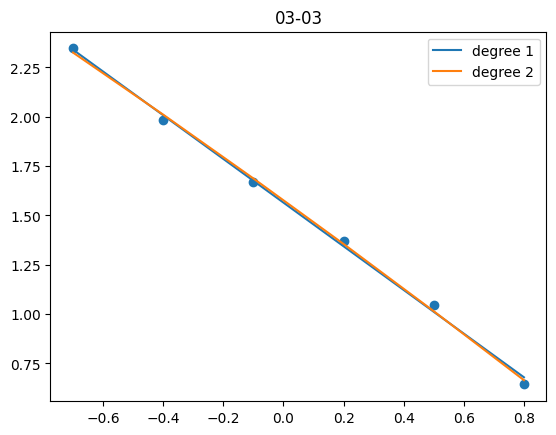

In [14]:
draw_plot(x_i, y_i, ls1, ls2)

In [ ]:

print(f"Least squares method, 1st degree\n")
print(f"P(x) = {format_polynom(f'{ls1[0]:.4f}+{ls1[1]:.4f}x')}\n")
print(f"Sum of squared errors = {sum_squared_errors(x_i, y_i, ls1)}\n")
print(f"Least squares method, 2nd degree\n")
print(f"P(x) = {format_polynom(f'{ls2[0]:.4f}+{ls2[1]:.4f}x+{ls2[2]:.4f}x^2')}\n")
print(f"Sum of squared errors = {sum_squared_errors(x_i, y_i, ls1)}\n")
